In [1]:
import pandas_datareader as pdr


In [2]:
df=pdr.get_data_tiingo('AAPL',api_key='85fbe81c7467a2d430f0c7f9c9e6bffa1c87a1eb')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("AAPL.csv")

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-07-05 00:00:00+00:00,144.09,144.79,142.7237,143.69,20758795,34.095092,34.260728,33.771793,34.000442,83035180,0.0,1.0
1,AAPL,2017-07-06 00:00:00+00:00,142.73,143.50,142.4100,143.02,23374374,33.773284,33.955484,33.697564,33.841905,93497496,0.0,1.0
2,AAPL,2017-07-07 00:00:00+00:00,144.18,144.75,142.9000,142.90,18505351,34.116388,34.251263,33.813510,33.813510,74021404,0.0,1.0
3,AAPL,2017-07-10 00:00:00+00:00,145.06,145.95,143.3700,144.11,21030466,34.324617,34.535212,33.924723,34.099824,84121864,0.0,1.0
4,AAPL,2017-07-11 00:00:00+00:00,145.53,145.85,144.3800,144.73,18311156,34.435830,34.511549,34.163713,34.246531,73244624,0.0,1.0


In [7]:
df1=df.reset_index()['close']

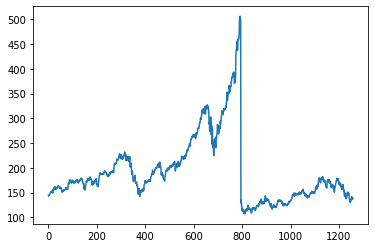

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
train_data

array([[9.32999374e-02],
       [8.98935504e-02],
       [9.35253601e-02],
       [9.57294928e-02],
       [9.69067001e-02],
       [9.74326863e-02],
       [1.02517220e-01],
       [1.05698184e-01],
       [1.07000626e-01],
       [1.08303068e-01],
       [1.10657483e-01],
       [1.08954289e-01],
       [1.08778961e-01],
       [1.13337508e-01],
       [1.14965560e-01],
       [1.16768942e-01],
       [1.09505322e-01],
       [1.06850344e-01],
       [1.04921728e-01],
       [1.08227927e-01],
       [1.25986224e-01],
       [1.22053851e-01],
       [1.24107702e-01],
       [1.30169067e-01],
       [1.33350031e-01],
       [1.35804629e-01],
       [1.21427677e-01],
       [1.26837821e-01],
       [1.32773951e-01],
       [1.37157170e-01],
       [1.35529117e-01],
       [1.27789606e-01],
       [1.26887915e-01],
       [1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],
       [1.40438322e-01],


In [12]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX, dataY=[],[];
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a);
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY) 

In [13]:
time_step=100
X_train, Y_train=create_dataset(train_data,time_step)
X_test, Y_test=create_dataset(test_data,time_step)

In [14]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 296ms/step - loss: 0.0572 - val_loss: 0.0102
Epoch 2/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0160 - val_loss: 0.0079
Epoch 3/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0119 - val_loss: 0.0016
Epoch 4/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0106 - val_loss: 7.7479e-04
Epoch 5/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0090 - val_loss: 0.0010
Epoch 6/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0087 - val_loss: 5.4062e-04
Epoch 7/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0078 - val_loss: 0.0010
Epoch 8/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0074 - val_loss: 2.7669e-04
Epoch 9/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0063 - val_loss: 0.0010
Epoch 10/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0

In [19]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

93751.74642395592

In [24]:
math.sqrt(mean_squared_error(Y_test,test_predict))

60937.99093659512

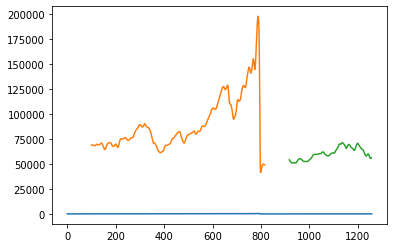

In [25]:
look_back=100
trainPredictPlot= numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot= numpy.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [26]:
x_input=test_data[341:].reshape(1,-1)


In [27]:
temp_input=list(x_input)


In [28]:
from numpy import array
lst_output=[]
i=0
n_steps=100
while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print("{} day input {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat)
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))

print(lst_output)      

[[0.0876925]]
2
[[0.0876925]]
3
[[0.0876925]]
4
[[0.0876925]]
5
[[0.0876925]]
6
[[0.0876925]]
7
[[0.0876925]]
8
[[0.0876925]]
9
[[0.0876925]]
10
[[0.0876925]]
11
[[0.0876925]]
12
[[0.0876925]]
13
[[0.0876925]]
14
[[0.0876925]]
15
[[0.0876925]]
16
[[0.0876925]]
17
[[0.0876925]]
18
[[0.0876925]]
19
[[0.0876925]]
20
[[0.0876925]]
21
[[0.0876925]]
22
[[0.0876925]]
23
[[0.0876925]]
24
[[0.0876925]]
25
[[0.0876925]]
26
[[0.0876925]]
27
[[0.0876925]]
28
[[0.0876925]]
29
[[0.0876925]]
30
[[0.0876925]]
31
[[0.0876925]]
32
[[0.0876925]]
33
[[0.0876925]]
34
[[0.0876925]]
35
[[0.0876925]]
36
[[0.0876925]]
37
[[0.0876925]]
38
[[0.0876925]]
39
[[0.0876925]]
40
[[0.0876925]]
41
[[0.0876925]]
42
[[0.0876925]]
43
[[0.0876925]]
44
[[0.0876925]]
45
[[0.0876925]]
46
[[0.0876925]]
47
[[0.0876925]]
48
[[0.0876925]]
49
[[0.0876925]]
50
[[0.0876925]]
51
[[0.0876925]]
52
[[0.0876925]]
53
[[0.0876925]]
54
[[0.0876925]]
55
[[0.0876925]]
56
[[0.0876925]]
57
[[0.0876925]]
58
[[0.0876925]]
59
[[0.0876925]]
60
[[0.0

In [29]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

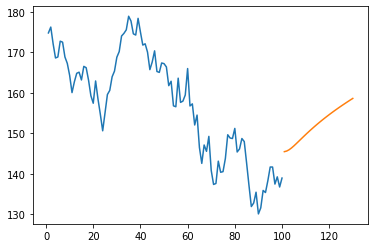

In [31]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

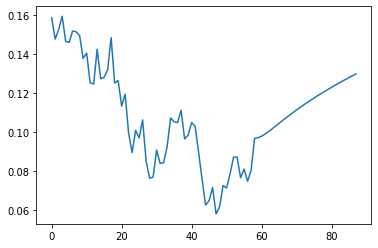

In [32]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [33]:
df3=scaler.inverse_transform(df3).tolist()

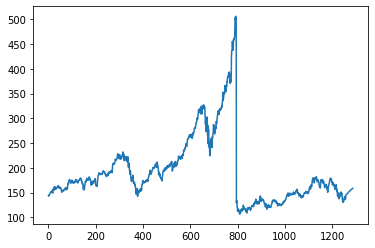

In [34]:
plt.plot(df3)
